# Abidam Real Estate Price Price Prediction Project, 2020

In [6]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)


In [7]:
#import data
df1 = pd.read_csv('bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df1.shape

(13320, 9)

In [13]:
df1.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

We assume columns 'area_type','availabilty','location','society'are not important so they are dropped

In [28]:
df2 = df1.drop(['area_type','availability','balcony','society'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [29]:
#check the null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [32]:
#drp the null values
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [36]:
#explore the size column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [37]:
#get the number from the size column and save for each in a new column bhk=bedroom,hall,kitchen

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [39]:
#check unique bhk
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [40]:
#explore the total_sqft column
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [41]:
#some values in the total_sqft are in ranges ant need to be converted to a single number
def is_float(x):
    try:
        float(x)      #convert to float
    except:
        return False  #return false if not convertible
    return True       # if successful

In [46]:
#get the the false
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [59]:
#get the mean of the total_sqft
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        value = float(tokens[0]) + float(tokens[1])
        mean_val = value/2
    try:
        return float(x)
    except:
        return None
        

In [60]:
convert_sqft_to_num('33440')

33440.0

In [61]:
convert_sqft_to_num('33440mtsqft')

In [62]:
#create a copy of df3
df4 = df3.copy()

#modify the total_sqft column to contain the changes made
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Feature Engineering

In [102]:
df6 = df4.copy()

In [104]:
#get the price per square feet
df6['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [66]:
#explore the location feature
len(df5.location.unique())

1304

In [109]:
#convert list to string
#def list_to_string(x):
#    str = ''
#    for i in x:
#        str += i
#    return str
#m = [m in df5['location']]
#list_to_string([d for d in m if])
#df5['location'] = df5['location'].apply(list_to_string)

In [113]:
#df6['location']

In [115]:
#remove empty space before and after each record of location
df6.location = df6.location.apply(lambda x: x.strip())

location_stats = df6.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield                                      535
Sarjapur  Road                                  392
Electronic City                                 304
Kanakpura Road                                  266
Thanisandra                                     236
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
Hoodi                                            88
KR 

In [125]:
#find the length of location start greater than 10
len(location_stats[location_stats <= 10])

1052

In [130]:
location_stats_lt_or_eq_to_ten = location_stats[location_stats <= 10]
#location_less_than_or_equal_to_ten

In [146]:
df6['location'] = df6['location'].apply(lambda x:'other' if x in location_stats_lt_or_eq_to_ten else x )
#df6 = df6.drop('lacation', axis='columns')
len(df6.location.unique())

242

In [147]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Outlier Removal

In [149]:
#remove record with value of total_sqft/khk < 300
df6[df6['total_sqft']/df6['bhk'] < 300].head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [150]:
df7 = df6[~(df6['total_sqft']/df6['bhk'] < 300)]
df7.shape

(12502, 7)

In [152]:
#explore the price_by_sqft column
df7.price_per_sqft.describe()

count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
25%        4208.545855
50%        5300.000000
75%        6938.987948
max      176470.588235
Name: price_per_sqft, dtype: float64

In [161]:
#practice
#for key,value in df7.groupby('location'):
    #print(np.mean(value.total_sqft))

In [179]:
#create a function to remove the outliers in the price per sqft(ppt) using 1(Z-score) standard deviation
def remove_ppt_outliers(df):
    df_new = pd.DataFrame() #create an empty dataframe
    for key, value in df.groupby('location'):           #get unique location
        loc_mean = np.mean(value.price_per_sqft)   #find the mean of each location price
        loc_std  = np.std(value.price_per_sqft)    #find the std of each location price
        no_outlier = value[(value.price_per_sqft > (loc_mean - loc_std)) & (value.price_per_sqft <= (loc_mean + loc_std))]
        df_new = pd.concat([df_new, no_outlier], ignore_index=True)
    return df_new
    
df8 = remove_ppt_outliers(df7)
df8.shape

(10140, 7)

In [182]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [183]:
#rough work
#for key, value in df7.groupby('location'):           #get unique location
    #loc_mean = np.mean(value.price_per_sqft)   #find the mean of each location price
    #loc_std  = np.std(value.price_per_sqft)    #find the std of each location price
    #no_outlier = value[(value.price_per_sqft > (loc_mean - loc_std)) & (value.price_per_sqft <= (loc_mean + loc_std))]
    #df_new = pd.concat([df_new, no_outlier], ignore_index=True)
    #df_ = pd.DataFrame(no_outlier)
    
#df_

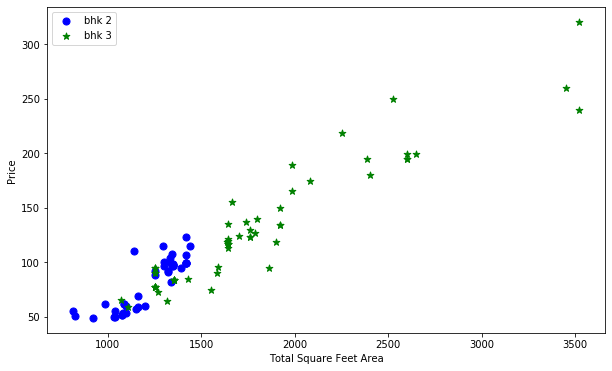

In [192]:
#plot for specific location to compare the location with bhk
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (10,6)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='b',label='bhk 2', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='g', marker='*',label='bhk 3', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.legend()

plot_scatter_chart(df8, 'Hebbal')    

 It is observed here that for some areas(e.g Hebbal) with the same Location and Total Square Feet Area, 2 bhk(i.e 2 bedroom and kitchen) has higher price than 3 bhk. These points need to be removed as they are inconsistent.   

In [205]:
#rough work
n = np.array([2, 3, 'list'])
n[0]

'2'

In [260]:
#rough work
for key,value in df8.groupby('location'):
    pass
    #print(value['size'].index.values)
    #print(value.groupby('bhk').count())

In [247]:
bhk_list = {}
for key,value in df8.groupby('bhk'):
    bhk_list[key] = {
        'mean': np.mean(value.price_per_sqft),
        'std': np.std(value.price_per_sqft)
    }  
#bhk_list

In [248]:
#rough work
for key,value2 in value.groupby('bhk'):
    bk = bhk_list.get(key-1)
    #print(bk)

In [289]:
#create a function
def remove_bhk_outliers(df):
    exclude_indices = np.array([])              #create an empty np array
    for location, location_df in df.groupby('location'):   #loop round the dataframe to get specific values of the location
        bhk_stats = {}                            #create an empty dict
        for bhk, bhk_df in location_df.groupby('bhk'):  #loop round the dataframe to get specific values of the bhk in value
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft), #find the mean
                'std':  np.std(bhk_df.price_per_sqft),  #find the standard deviation
                'count': bhk_df.shape[0] #find the count
            }
        for bhk, bhk_df in location_df.groupby('bhk'):       #get the all values apart not 1
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
                
df9 = remove_bhk_outliers(df8)
df9.shape

(7217, 7)

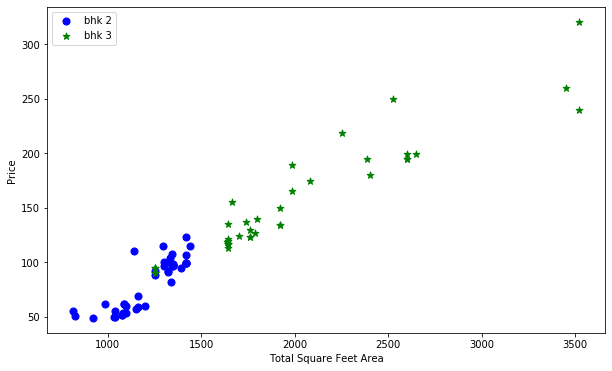

In [291]:
#check the scatter plot again
plot_scatter_chart(df9, 'Hebbal')

Most of the outliers are gone 

Text(0, 0.5, 'Count')

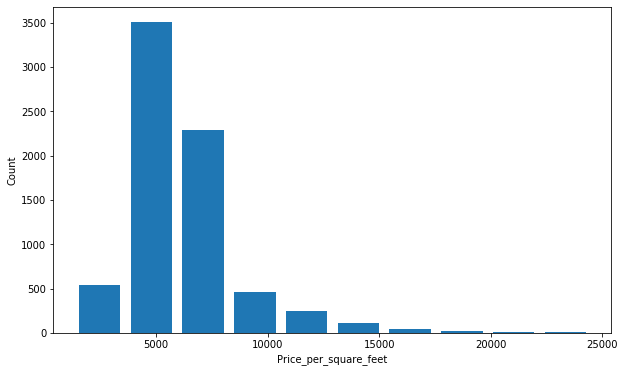

In [293]:
#visualizing the price_per_sqft with histogam
plt.hist(df9.price_per_sqft, rwidth=0.8)
plt.xlabel('Price_per_square_feet')
plt.ylabel('Count')

The distribution is normal from the visualization above

In [294]:
# exploring the bathroom column
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [295]:
#check bathroom geater than 10
df9[df9.bath > 10].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5221,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8388,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8477,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9210,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9539,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

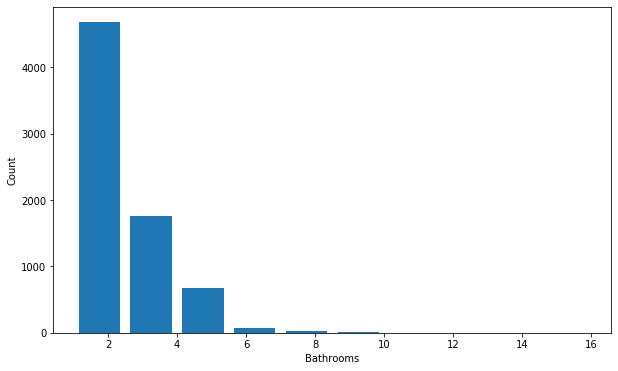

In [296]:
#visualize the numbers of bathroom using histogram
plt.hist(df9.bath, rwidth=0.8)
plt.xlabel('Bathrooms')
plt.ylabel('Count')

In [297]:
#find the number of bath greater than bhk+2
df9[df9.bath > df9.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1611,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5182,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6639,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8313,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [298]:
#remove the outlier bath greater than bhk+2
df9 = df9[df9.bath < df9.bhk+2]
df9.shape

(7144, 7)

In [299]:
#drop unneeded columns for the model
df10 = df9.drop(['size','price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


Model Building

In [301]:
#convert the location feature to integer
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
#drop the location column
df12 = df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
df12.shape

(7144, 245)

In [306]:
#get the independent variable X
X = df12.drop('price', axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [307]:
#get the dependent variable
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [310]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [311]:
#import training model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [312]:
lin_model.score(X_test, y_test)

0.8046858769914245

In [314]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [319]:
ShuffleSplit?

In [323]:
cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([-1.08559752e+17,  7.73589508e-01,  8.68629818e-01,  8.50679312e-01,
        8.67827806e-01])

In [329]:
from sklearn.model_selection import GridSearchCV
GridSearchCV?

In [350]:
#use gridsearchcv to get the best model
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model_using_gridsearchcv(x,y_):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize':[True, False],
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    #get the accuracy scores
    scores = []
    cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for key, value in algos.items():
        gs = GridSearchCV(value['model'], value['params'], cv=cv, return_train_score=False)
        gs.fit(x,y_)
        scores.append({
            'model': key,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    #print(scores)   
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,-2.171195e+16,{'normalize': False}
1,lasso,6.728996e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,6.916938e-01,"{'criterion': 'mse', 'splitter': 'random'}"


The previous LinearRegression model accuracy score is better than the scoresfrom the grid search so it is used

In [351]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [360]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [366]:
#example
loc_index = np.where(X.columns == 'Yelahanka New Town')[0][0]
loc_index

241

In [376]:
#making predictions
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0] #to get the index of the city
    
    x = np.zeros(len(X.columns)) # give all the columns a zero value
    x[0] = sqft        #give the first column the sqrt value
    x[1] = bath        #give the second column the bath value
    x[2] = bhk         #give the third column the bhk value
    
    if loc_index >= 0:    #get the index of the location passed
        x[loc_index] = 1  #set the column of the location passed 1
    
    return lin_model.predict([x])[0] #indexing to get the value only


In [377]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

81.21964375519539

In [388]:
predict_price('1st Phase JP Nagar', 1000, 6, 3)

82.15173446935685

In [383]:
predict_price('Indira Nagar', 1000, 2, 2)

166.14688893467923

In [384]:
predict_price('Indira Nagar', 1000, 3, 3)

163.34483117198164

In [389]:
#change the model to be serialized for the flask server
import pickle
with open('bangalore_home_price_s_model.pickle', 'wb') as f:
    pickle.dump(lin_model,f)

In [391]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [359]:
#rough work
a = np.arange(10)

b=np.where(a<5, 1, 10*a)
b

array([ 1,  1,  1,  1,  1, 50, 60, 70, 80, 90])

In [370]:
x = np.zeros(5)

In [371]:
x[0]=1
x

array([1., 0., 0., 0., 0.])